## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse_ID", "Mouse_ID"])
# Display the data table for preview
combined.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
mouse_metadata.columns 
study_results.columns

Index(['Mouse_ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [6]:
# Checking the number of mice.
mouse_metadata["Mouse_ID"].count() #249
study_results["Mouse_ID"].count() #1893



1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined.loc[combined.duplicated(subset =["Mouse_ID","Timepoint"]),"Mouse_ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data_index = combined.loc[combined["Mouse_ID"]=='g989']
duplicate_mouse_data_index



,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
len(study_results["Mouse_ID"].drop_duplicates())

249

In [10]:
complete = combined[combined["Mouse_ID"].isin(duplicate_mice )== False]
complete

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame
complete["Mouse_ID"].nunique()

248

## Summary Statistics

In [12]:
complete.groupby(["Drug Regimen"]).sem()

,Age_months,Metastatic Sites,Mouse_ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
Drug Regimen,,,,,,,
Capomulin,0.509136,0.055981,NaN,NaN,0.948518,0.329346,0.180169
Ceftamin,0.604977,0.088766,NaN,NaN,1.070629,0.469821,0.118535
Infubinol,0.562919,0.076985,NaN,NaN,1.009879,0.492236,0.163684
Ketapril,0.439030,0.101659,NaN,NaN,1.023238,0.603860,0.134333
Naftisol,0.492430,0.089200,NaN,NaN,1.040081,0.596466,0.109930
Placebo,0.472356,0.099514,NaN,NaN,1.032495,0.581331,0.136615
Propriva,0.570986,0.090952,NaN,NaN,1.124214,0.544332,0.140799
Ramicane,0.393825,0.045780,NaN,NaN,0.945433,0.320955,0.214244
Stelasyn,0.590143,0.072252,NaN,NaN,1.028921,0.573111,0.122169


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor = np.mean(complete["Tumor Volume (mm3)"])
median_tumor = np.median(complete["Tumor Volume (mm3)"])
variance_tumor = np.var(complete["Tumor Volume (mm3)"])
tumor_sd = np.std(complete["Tumor Volume (mm3)"])
tumor_sem = int(sem(complete["Tumor Volume (mm3)"]))


summary_complete = pd.DataFrame(
                    {"Mean": mean_tumor,
                     "Median" : median_tumor,
                     "Variance" : variance_tumor,
                     "Standard Deviation" : tumor_sd,
                     "SEM" : tumor_sem
                    }, index= ["Tumor Volume (mm3)"])
summary_complete.groupby(["Drug Regimen"])
summary_complete



,Mean,Median,Variance,Standard Deviation,SEM
Tumor Volume (mm3),50.435293,48.933454,79.42064,8.911826,0


In [14]:
complete.groupby(["Drug Regimen"]).sem()

,Age_months,Metastatic Sites,Mouse_ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
Drug Regimen,,,,,,,
Capomulin,0.509136,0.055981,NaN,NaN,0.948518,0.329346,0.180169
Ceftamin,0.604977,0.088766,NaN,NaN,1.070629,0.469821,0.118535
Infubinol,0.562919,0.076985,NaN,NaN,1.009879,0.492236,0.163684
Ketapril,0.439030,0.101659,NaN,NaN,1.023238,0.603860,0.134333
Naftisol,0.492430,0.089200,NaN,NaN,1.040081,0.596466,0.109930
Placebo,0.472356,0.099514,NaN,NaN,1.032495,0.581331,0.136615
Propriva,0.570986,0.090952,NaN,NaN,1.124214,0.544332,0.140799
Ramicane,0.393825,0.045780,NaN,NaN,0.945433,0.320955,0.214244
Stelasyn,0.590143,0.072252,NaN,NaN,1.028921,0.573111,0.122169


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor = complete.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]
tumor_regimen = tumor.groupby(["Drug Regimen"]) 
tumor_summary = tumor_regimen.describe()
tumor_variance = tumor_regimen.var()
tumor_median = tumor_regimen.median()
tumor_sem = tumor_regimen.sem()
tumor_summary["SEM"] = tumor_sem.transform("Tumor Volume (mm3)")
tumor_summary

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                                    SEM  
                    50%        75%        max            
Drug Regimen                                             
Capomulin     41.557809  45.000000  48.158209  0.329346  
Ceftamin      51.776157  56.801438  68.923185  0.469821  
Infubinol     51.820584  57.314444  72.226731  0.492236  
Ketapril      53.698743  60.870951  78.567014  0.603860  
Naftisol      52.509285  59.963034  76.668817  0.596466  
Placebo       52.288934  59.916934  73.212939  0.581331  
Propriva      50.446266  56.491585  72.455421  0.544332  
Ramicane      40.673236  45.000000  47.622816  0.320955  
Stelasyn      52.431737  58.719297  75.123690  0.573111  
Zoniferol     51.818479  57.954259  73.324432  0.516398

## Bar and Pie Charts

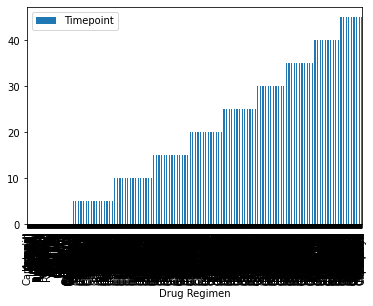

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
complete.plot.bar(x="Drug Regimen", y="Timepoint")



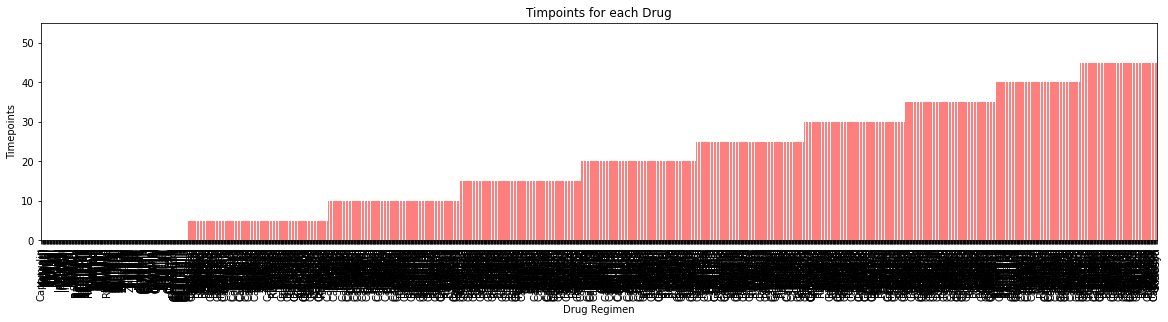

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(complete))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, complete["Timepoint"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, complete["Drug Regimen"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(complete["Timepoint"])+10)
plt.title("Timpoints for each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
